In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
df = pd.read_csv("D:\Desktop\Machine Learning\Decision Tree\customer_churn_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ABDULLAH AL MASUM\AppData\Local\Temp\ipykernel_8304\3481269900.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Desktop\Machine Learning\Decision Tree\customer_churn_data.csv")


In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [12]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

# Incode

In [14]:
# le = LabelEncoder()

In [15]:
# for col in df.columns:
#   df[col] = le.fit_transform(df[col])

In [16]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,0
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,1
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,1
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,0
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,1


In [18]:
x = df.drop(['Churn'], axis=1)
y = df['Churn']

In [19]:
x = pd.get_dummies(x, drop_first=True)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42, test_size= .3,stratify=y)

## Use Only Decision Tree

In [21]:
tree = DecisionTreeClassifier(
  random_state= 42,
  class_weight='balanced',
  min_samples_leaf=20,
  min_samples_split=20,
  max_depth=5
  )

In [22]:
tree_model = tree.fit(x_train, y_train)

### Check the model overfit, underfit or perfect

In [23]:
tree_model.score(x_train, y_train)

0.5291545189504373

In [24]:
# the model is completely overfit
tree_model.score(x_test, y_test)

0.5170068027210885

In [25]:
pred_y = tree_model.predict(x_test)

In [26]:
accuracy_score(pred_y, y_test)

0.5170068027210885

In [27]:
cm = confusion_matrix(pred_y, y_test)

In [28]:
cm

array([[349, 306],
       [546, 563]])

<Axes: >

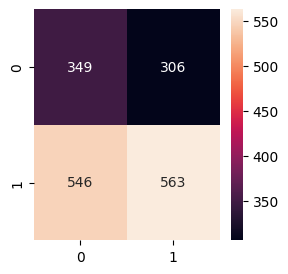

In [29]:
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot= True, fmt="g")

# Using GridSearchCV

In [30]:
parameter = {
  "criterion" : ['gini', 'entropy', 'log_loss'],
  'splitter' : ['best', 'random'],
  'max_depth' : [5,6,7,8,9,10],
  'ccp_alpha' : [1, 0.1, 0.001, .01],
  'min_samples_split': [5, 10, 20],
  'min_samples_leaf': [5, 10, 20],
  'max_features' : ['sqrt', 'log2']
}

In [31]:
grid = GridSearchCV(estimator=tree, param_grid=parameter, cv = 5, verbose=2)

In [32]:
grid

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'ccp_alpha': [1, 0.1, ...], 'criterion': ['gini', 'entropy', ...], 'max_depth': [5, 6, ...], 'max_features': ['sqrt', 'log2'], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [33]:
grid_model = grid.fit(x_train, y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
[CV] END ccp_alpha=1, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END ccp_alpha=1, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END ccp_alpha=1, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END ccp_alpha=1, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END ccp_alpha=1, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END ccp_alpha=1, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END ccp_alpha=1, criterion=gini, max_depth=5, max_feature

KeyboardInterrupt: 

In [ ]:
grid_model.best_estimator_

,criterion,'gini'
,splitter,'best'
,max_depth,9
,min_samples_split,5
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [ ]:
grid_model.best_index_

np.int64(2094)

In [ ]:
grid_model.score(x_train, y_train)

0.7567471590909091

In [ ]:
grid_model.score(x_test, y_test)

0.7317880794701986

In [ ]:
pred_y2 = grid_model.predict(x_test)

In [ ]:
# y_proba = grid_model.best_estimator_.predict_proba(x_test)[:,1]

In [ ]:
# y_pred = (y_proba > 0.7).astype(int)

In [ ]:
accuracy_score(pred_y2, y_test)

0.7317880794701986

In [ ]:
cm2 = confusion_matrix(pred_y2, y_test)

In [ ]:
cm2

array([[742,  43],
       [281, 142]])

<Axes: >

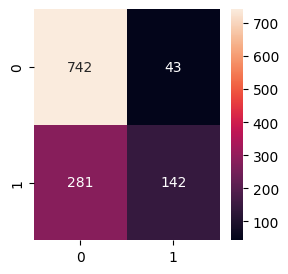

In [ ]:
plt.figure(figsize=(3,3))
sns.heatmap(cm2, annot= True, fmt="g")

## Random Search CV

In [ ]:
Random = RandomizedSearchCV(estimator= tree_model, param_distributions= parameter, cv = 5, verbose= 2, n_iter= 20, random_state=42)

In [ ]:
Random_model = Random.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=20, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=20, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=20, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=20, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=20, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=log_loss, max_depth=10, max_features=log2, min_samples_leaf=20, min_samples_split=20, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.1, criterion=

In [ ]:
Random_model.score(x_train, y_train)

0.15305397727272727

In [ ]:
Random_model.score(x_test, y_test)

0.15314569536423842

In [ ]:
pred_y3 = Random_model.predict(x_test)

In [ ]:
accuracy_score(pred_y3, y_test)

0.15314569536423842

In [ ]:
cm3 = confusion_matrix(pred_y3, y_test)

In [ ]:
cm3

array([[   0,    0],
       [1023,  185]])

# ROC Curve

### GridSearchCV

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
# Best model
best_grid_model = grid_model.best_estimator_

In [ ]:
# Probability
y_proba_grid = best_grid_model.predict_proba(x_test)[:,1]

In [ ]:
y_proba_grid

array([0.24557249, 0.77278747, 0.24557249, ..., 0.24557249, 0.24557249,
       0.77278747], shape=(1208,))

In [ ]:
fpr_grid , tpr_grid, _ = roc_curve(y_test, y_proba_grid)
auc_grid = auc(fpr_grid, tpr_grid)

C:\Users\ABDULLAH AL MASUM\AppData\Local\Temp\ipykernel_25888\557636442.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


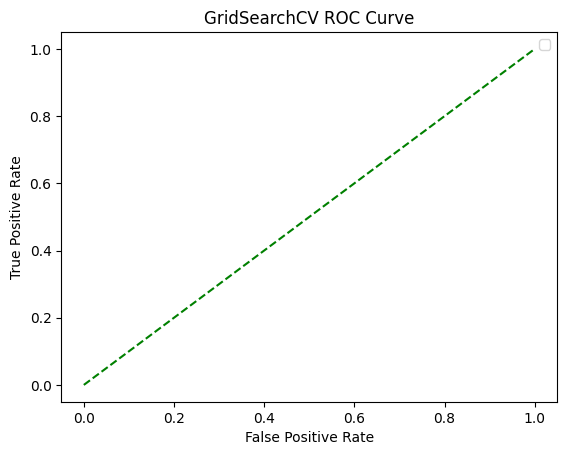

In [ ]:
plt.figure()
# plt.plot(fpr_grid, tpr_grid, label = f"GridSearch (AUC = {auc_grid:.2f})")
plt.plot([0,1], [0,1], linestyle = '--', color = 'green')
plt.title("GridSearchCV ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### RandomizedSearchCV ROC Curve

In [ ]:
best_random_model = Random_model.best_estimator_

In [ ]:
y_proba_random = best_random_model.predict_proba(x_test)[:,1]

In [ ]:
fpr_random, tpr_random, _ = roc_curve(y_test, y_proba_random)
auc_random = auc(fpr_random, tpr_random)

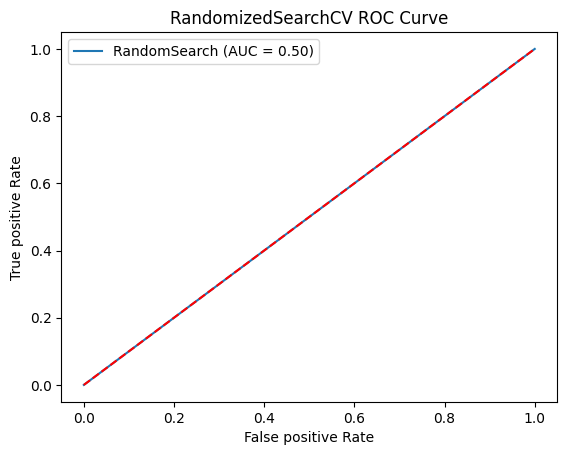

In [ ]:
plt.figure()
plt.plot(fpr_random, tpr_random, label=f'RandomSearch (AUC = {auc_random:.2f})')
plt.plot([0,1], [0,1], linestyle = '--', color = 'red')
plt.title("RandomizedSearchCV ROC Curve")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.legend()
plt.show()

### RandomizedSearchCV and GridSearchCV ROC Curve

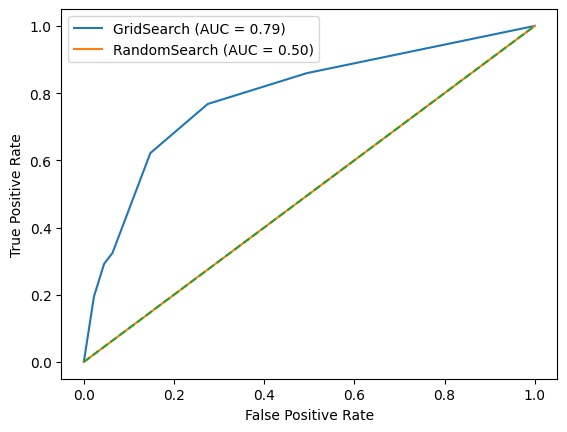

In [ ]:
plt.Figure()
plt.plot(fpr_grid, tpr_grid, label=f'GridSearch (AUC = {auc_grid:.2f})')
plt.plot(fpr_random, tpr_random, label=f'RandomSearch (AUC = {auc_random:.2f})')
plt.plot([0,1], [0,1], linestyle = '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()